In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
215,LP001720,Male,Yes,3+,Not Graduate,No,3850,983.0,100.0,360.0,1.0,Semiurban,Y
446,LP002434,Male,Yes,2,Not Graduate,No,4652,0.0,110.0,360.0,1.0,Rural,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Variables:
- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

- Loan_Status

In [10]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
#Let's drop unwanted features

data=data.drop('Loan_ID', axis = 1)
data=data.drop('Gender', axis = 1)

In [12]:
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
data=data.dropna()
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
for i in data.columns:
    if data[i].dtype == object:
        print(str(i) + ' : '+ str(data[i].unique()))
        print('__________________________________________________________________________________')

Married : ['Yes' 'No']
__________________________________________________________________________________
Dependents : ['1' '0' '2' '3+']
__________________________________________________________________________________
Education : ['Graduate' 'Not Graduate']
__________________________________________________________________________________
Self_Employed : ['No' 'Yes']
__________________________________________________________________________________
Property_Area : ['Rural' 'Urban' 'Semiurban']
__________________________________________________________________________________
Loan_Status : ['N' 'Y']
__________________________________________________________________________________


In [15]:
#Checking and removing if there is any Duplicate entry present in our dataset
data.drop_duplicates(inplace=True)
data.shape

(491, 11)

1 Duplicate record deleted

In [16]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=data.columns.values.tolist()

for col in features:
    if data[col].dtypes in numerics:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [17]:
# Checking for Multicollinearity using VIF

w = data[list(data.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,9.458373,Loan_Amount_Term
8,8.827411,Credit_History
6,6.586619,LoanAmount
10,4.661317,Loan_Status
0,3.397250,Married
4,2.872810,ApplicantIncome
9,2.577982,Property_Area
1,1.931712,Dependents
5,1.522365,CoapplicantIncome
2,1.257205,Education


All the VIF values are less, so it's safe to proceed

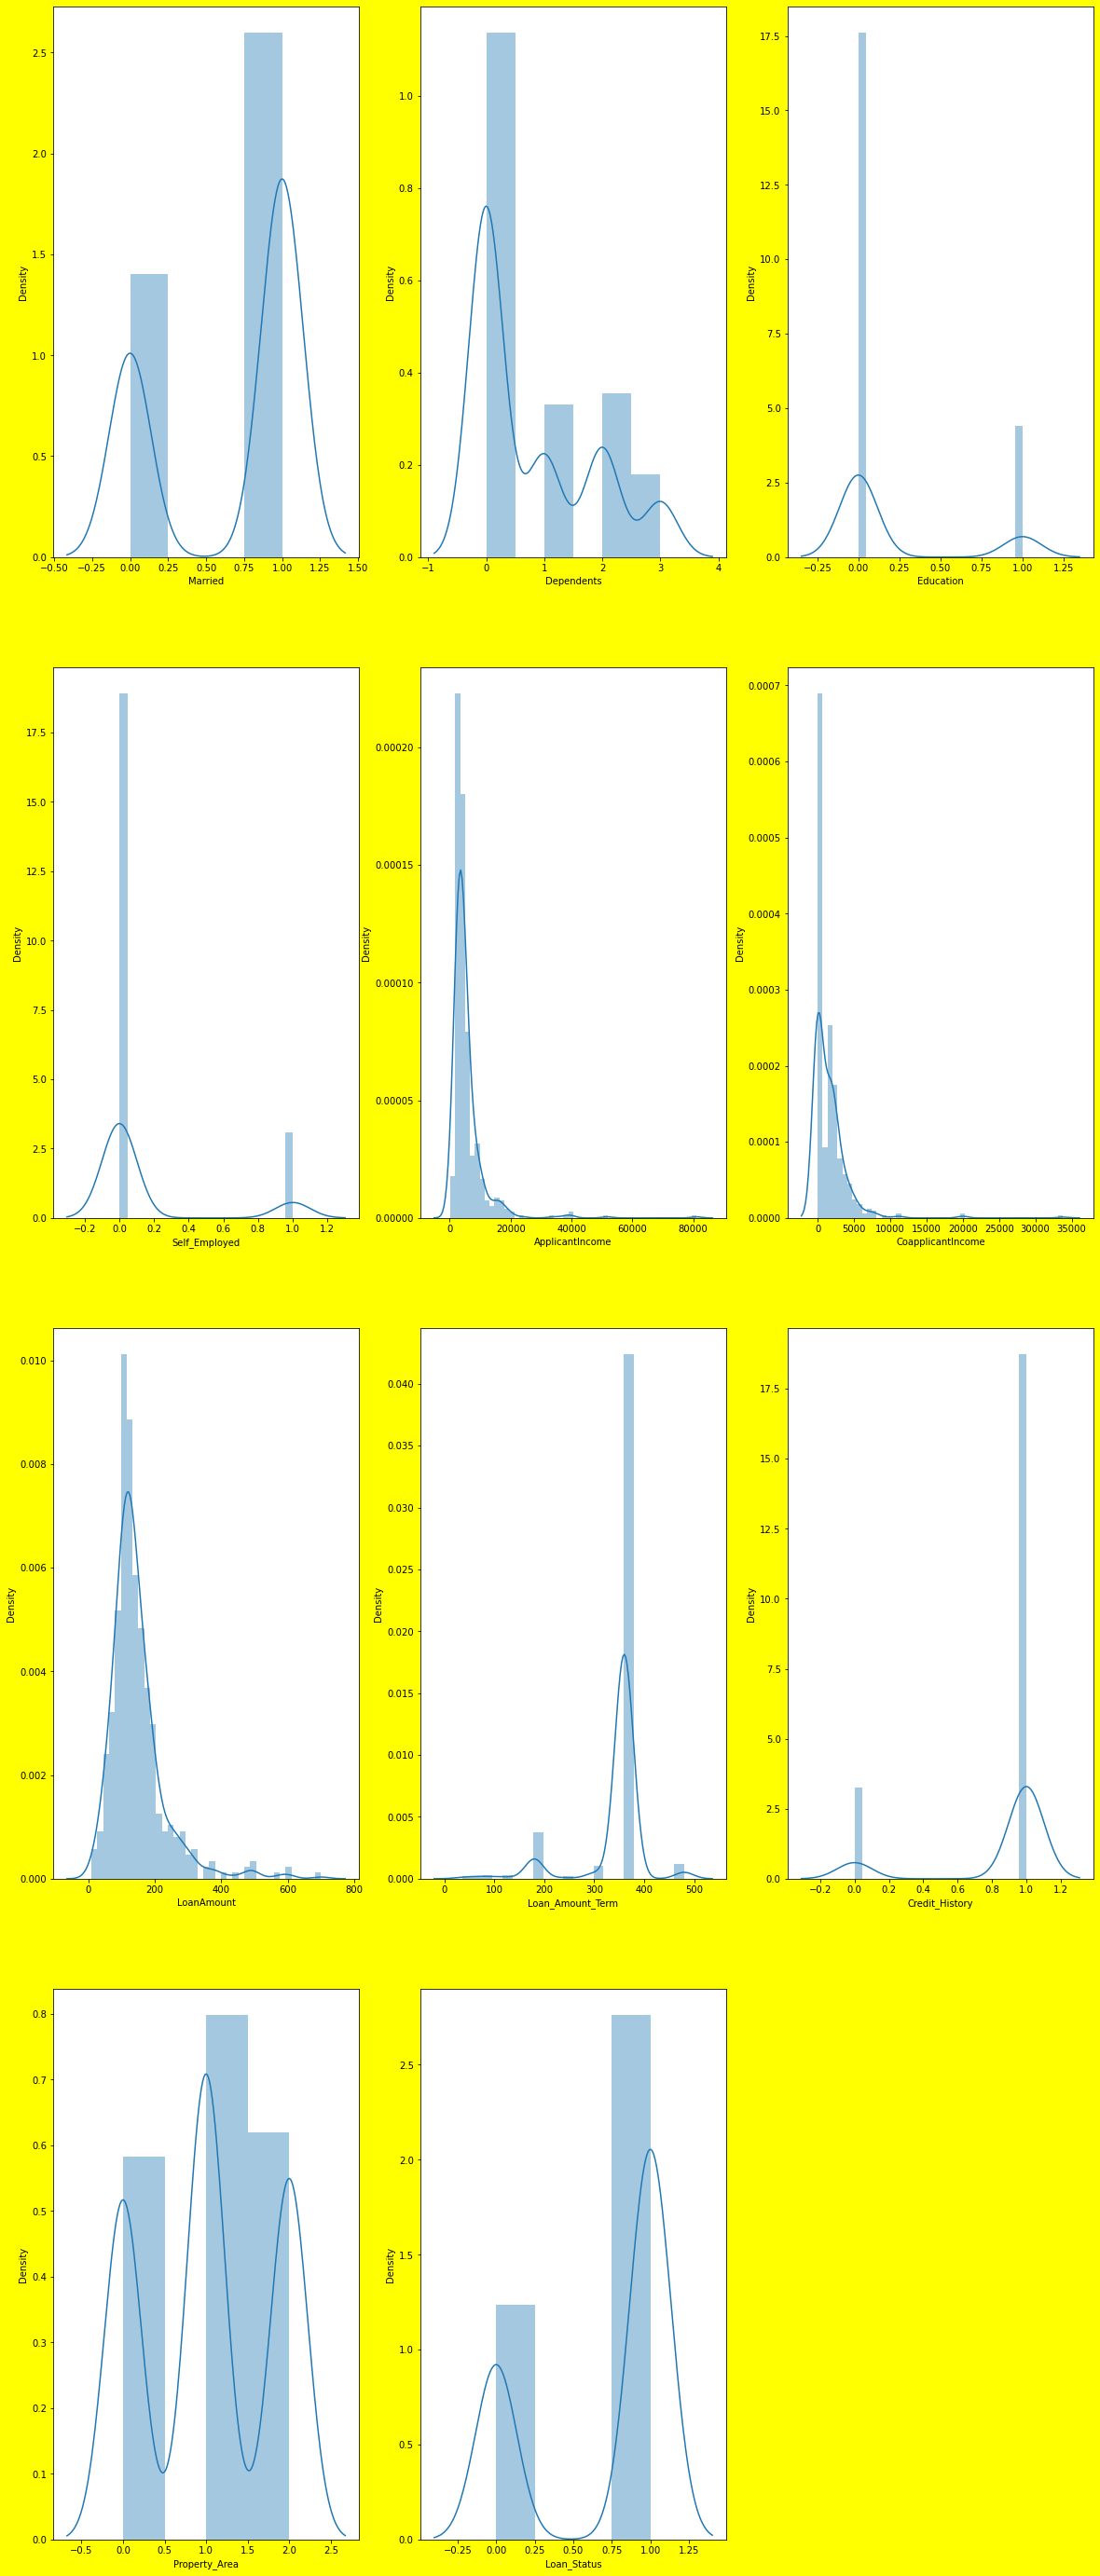

In [18]:
plt.figure(figsize=(20,50),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

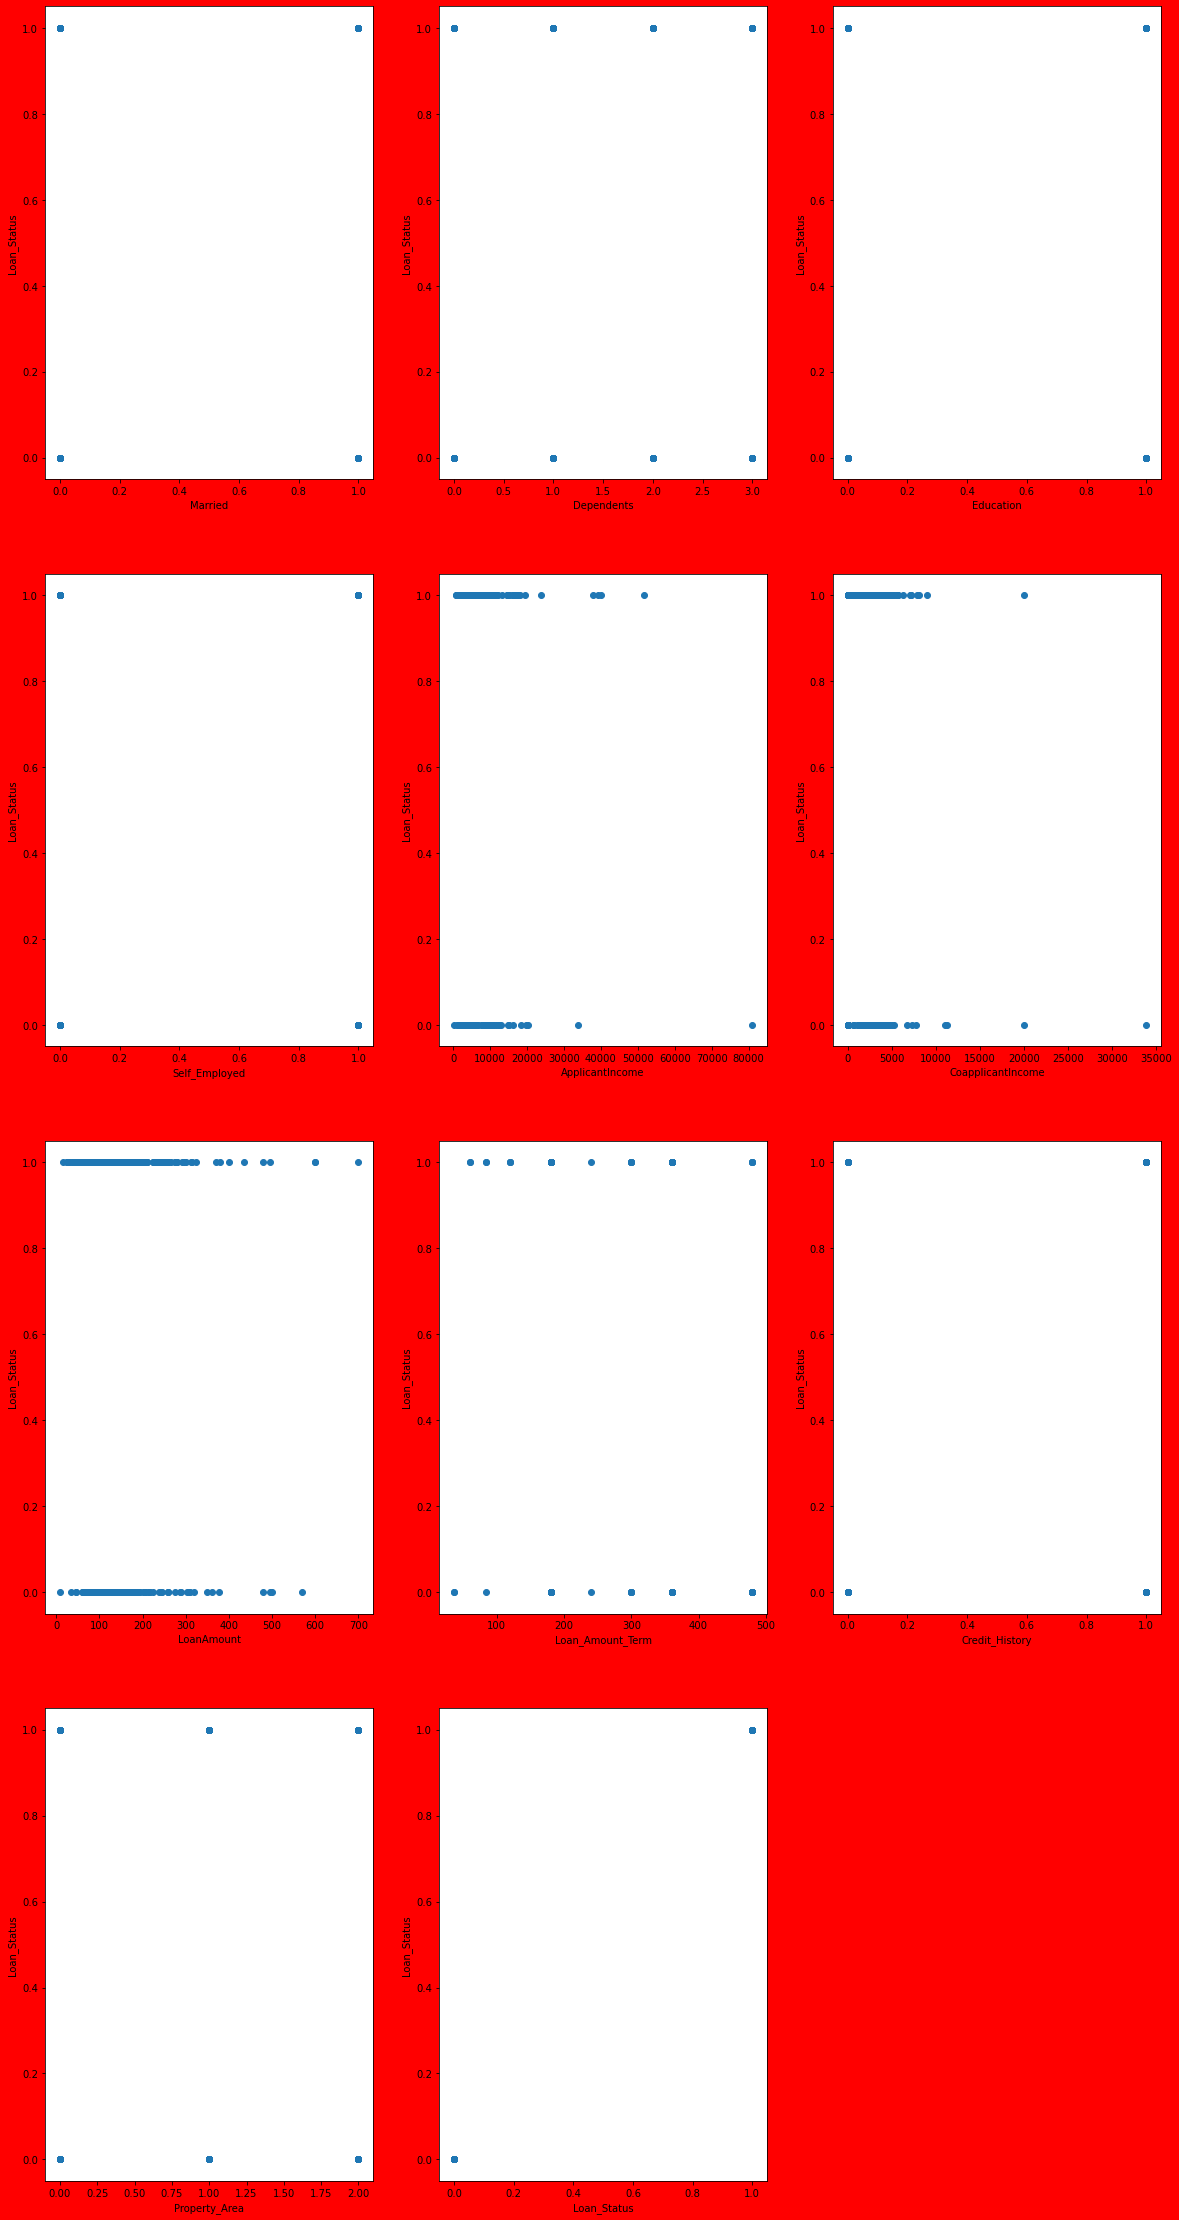

In [19]:
plt.figure(figsize=(20,40), facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(data[column],data["Loan_Status"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Loan_Status', fontsize=10)
    plotnumber+=1
plt.show()

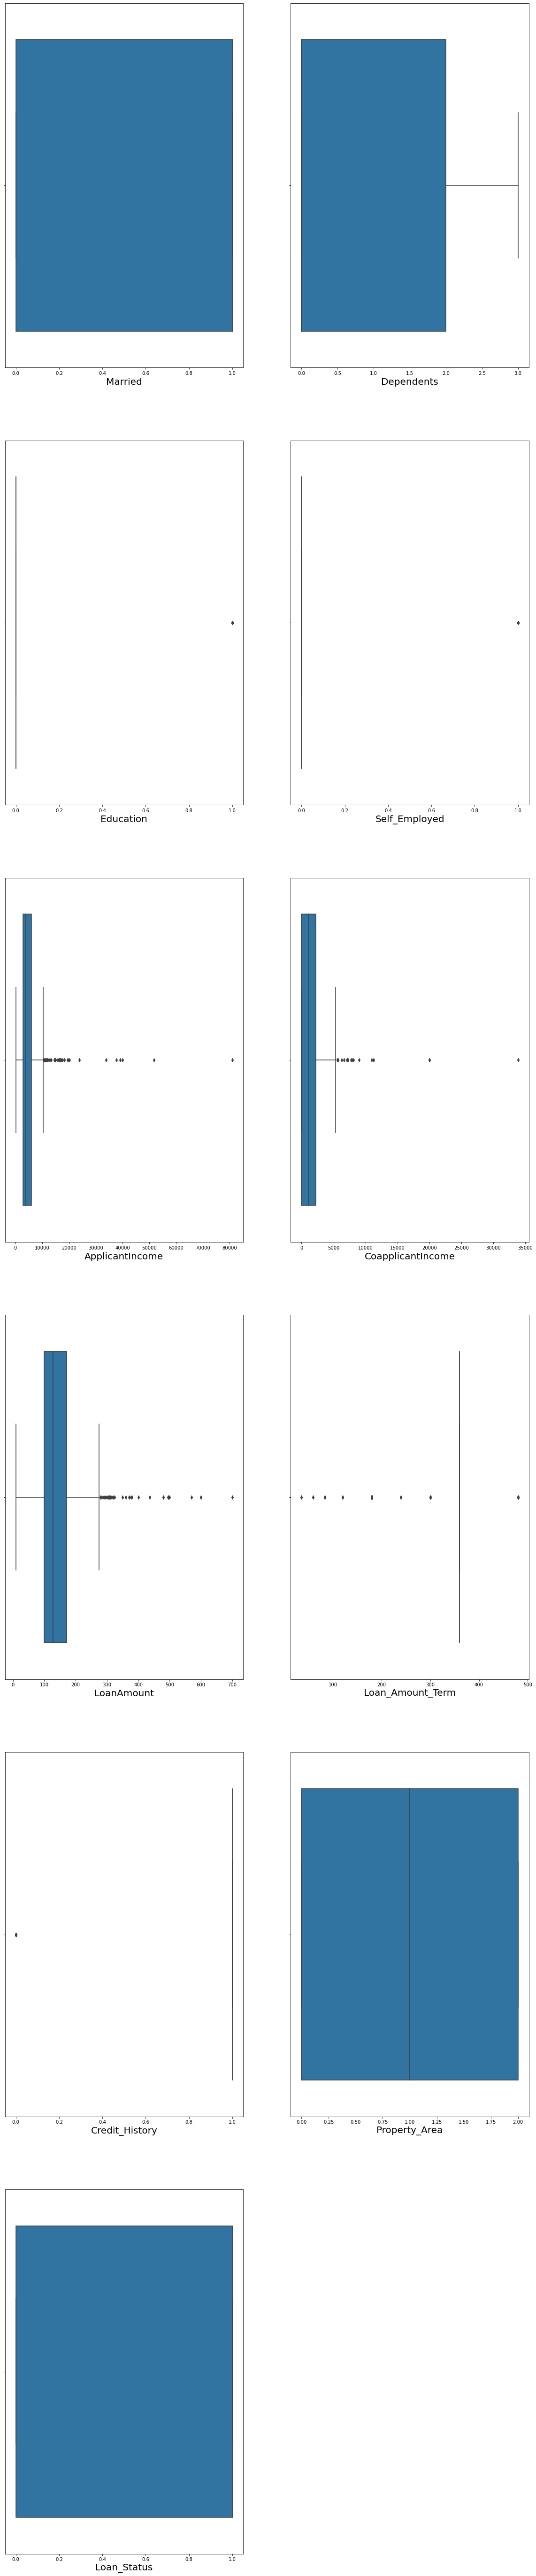

In [20]:
plt.figure(figsize=(20,100))
graph=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,graph)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

There are outliers present in our dataset in features like:

-ApplicantIncome

-CoapplicantIncome

-LoanAmount

-Loan_Amount_Term

In [21]:
data.shape

(491, 11)

In [22]:
#1st Quantile
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

iqr=q3-q1

In [23]:
ApplicantIncome_high=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
index=np.where(data['ApplicantIncome']>ApplicantIncome_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
445,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
446,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
447,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
448,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [24]:
CoapplicantIncome_high=(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
index=np.where(data['CoapplicantIncome']>CoapplicantIncome_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
425,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
426,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
427,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
428,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [25]:
LoanAmount_high=(q3.LoanAmount+(1.5*iqr.LoanAmount))
index=np.where(data['LoanAmount']>LoanAmount_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
418,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
419,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
420,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
421,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [26]:
Loan_Amount_Term_high=(q3.Loan_Amount_Term+(1.5*iqr.Loan_Amount_Term))
index=np.where(data['LoanAmount']>LoanAmount_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
418,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
419,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
420,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
421,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Total 68 outliers treated

### Let's plot the heatmap to check corelation

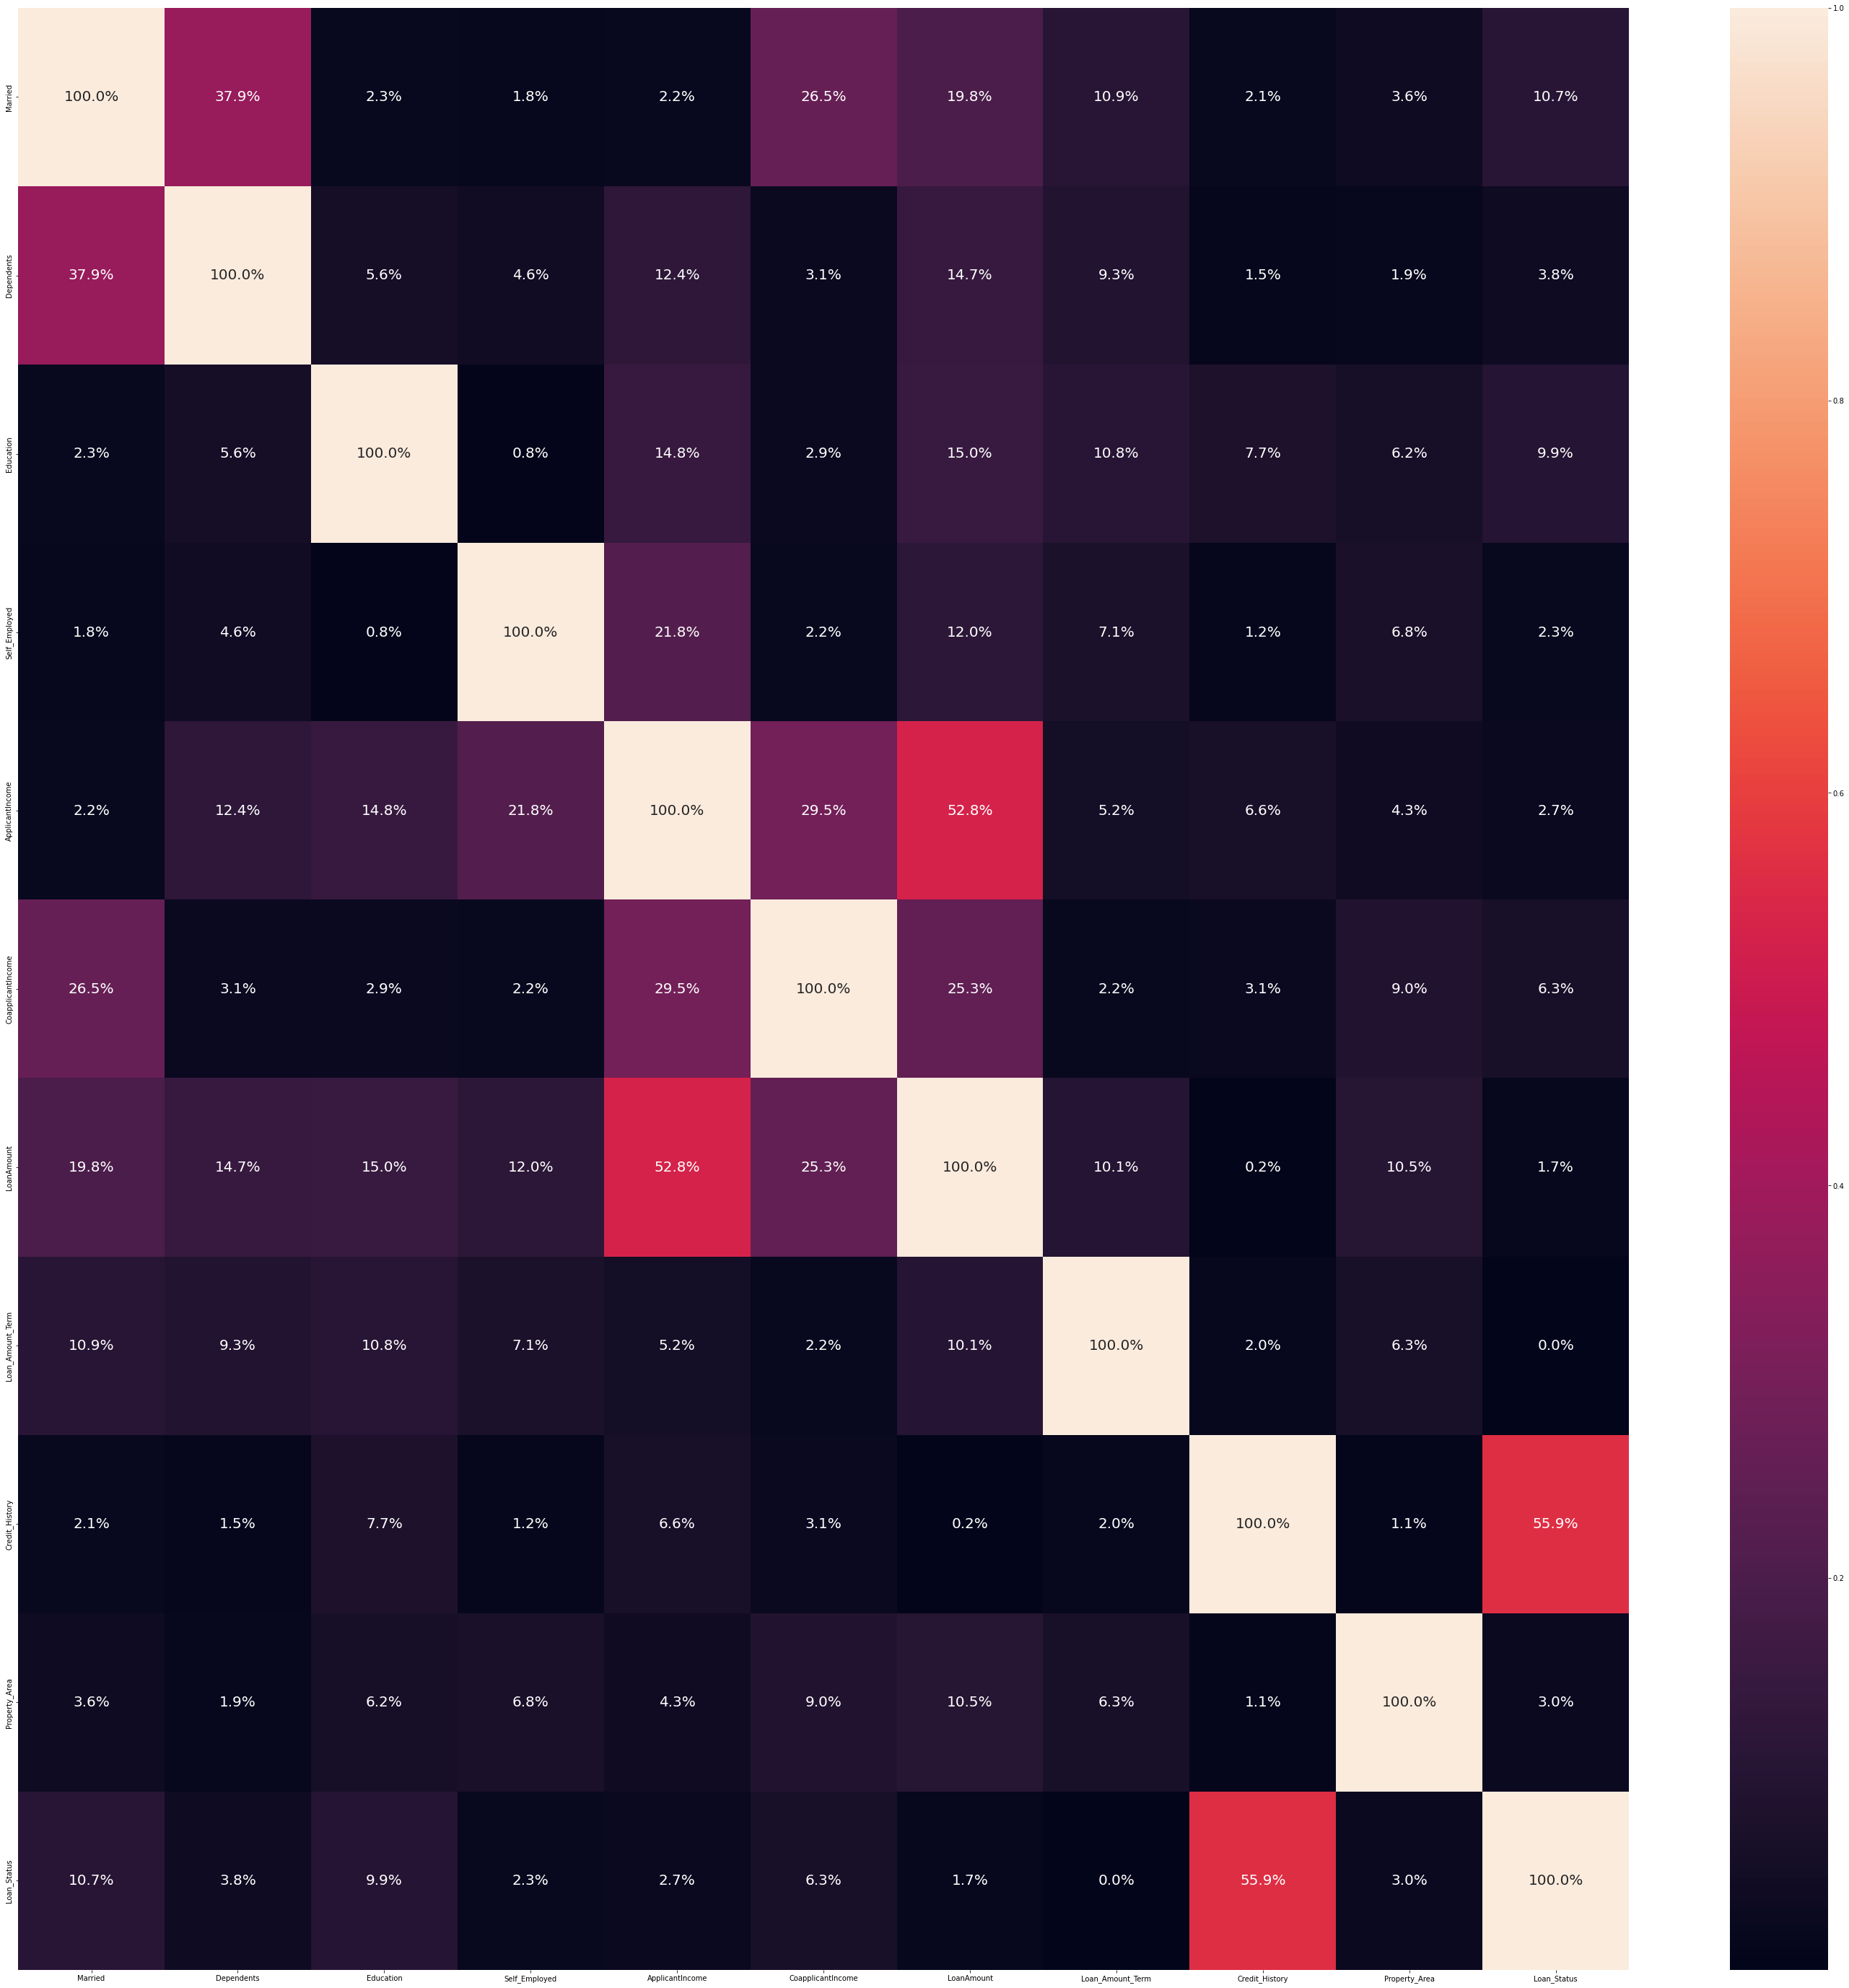

In [27]:
df_corr=data.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20}, fmt='.1%')
plt.show()

In [28]:
#Checking if our balanced or not

data['Loan_Status'].value_counts()

1    294
0    129
Name: Loan_Status, dtype: int64

This clearly shows our data is little imbalanced, we need to balance our data using SMOTE

### Let's balance our data now

In [29]:
# Let us know split our data into Features & labels

x=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']

In [30]:
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(x)

In [31]:
# Now let's split our data into Train_test_split

x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=44)

In [32]:
y_train.value_counts()

1    214
0    103
Name: Loan_Status, dtype: int64

In [33]:
sm=SMOTE()

In [34]:
ove_smp=SMOTE(0.75)

x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

In [35]:
y_train_ns.value_counts()

1    214
0    160
Name: Loan_Status, dtype: int64

Now our data seems to be in good shape and balanced

### All our preprocessing is over now and our data is ready for model building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [37]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [38]:
#Training of Models starts here

lr.fit(x_train_ns,y_train_ns)
knn.fit(x_train_ns,y_train_ns)
dt.fit(x_train_ns,y_train_ns)
rf.fit(x_train_ns,y_train_ns)

print('Training completed')

Training completed


In [39]:
#Let's check the scores now

print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.839622641509434
0.7830188679245284
0.7735849056603774
0.839622641509434


Above scores clearly says, the best model is RandomForest

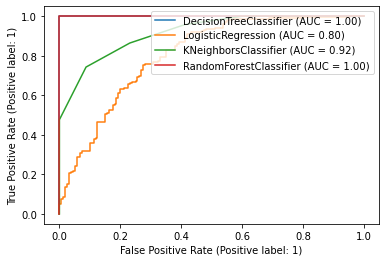

In [40]:
#Confusion Matrix

show=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train_ns,y_train_ns,ax=show.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=show.ax_)
plot_roc_curve(rf,x_train_ns,y_train_ns,ax=show.ax_)
plt.legend(prop={'size':10}, loc='upper right')
plt.show()

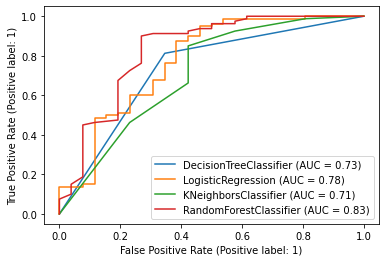

In [41]:
show=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=show.ax_)
plot_roc_curve(knn,x_test,y_test,ax=show.ax_)
plot_roc_curve(rf,x_test,y_test,ax=show.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [42]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [43]:
print('Logistic Regression:',accuracy_score(y_test,lr_pred))
print('KNN :',accuracy_score(y_test,knn_pred))
print('Decision Tree :', accuracy_score(y_test,dt_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))

Logistic Regression: 0.839622641509434
KNN : 0.7830188679245284
Decision Tree : 0.7735849056603774
Random Forest : 0.839622641509434


From all the above observations and scores, it is clear that RandomForest model is working the best so we will move ahead with RandomForest.

### Let's do Hyperparameter tuning using GridSearchCV

In [44]:
#Let's do some Hyperparameter tuning using GridSearchCV algorithm
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split': range(2,10),
    'max_leaf_nodes':range(2,5)
}

In [45]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [46]:
grid_search.fit(x_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

Note: 

1.In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

2.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [47]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [48]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=2,min_samples_split=2,max_depth=10,min_samples_leaf=2)
r_f=RandomForestClassifier(criterion='gini',max_leaf_nodes=2,min_samples_split=2,max_depth=10,min_samples_leaf=2)

In [49]:
dec_tree.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2)

Note:

1.In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

2.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [51]:
r_f.fit(x_train_ns,y_train_ns)

RandomForestClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2)

Note:

1.In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

2.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [52]:
y1_pred=dec_tree.predict(x_test)
y2_pred=r_f.predict(x_test)

In [53]:
accuracy_score(y_test,y1_pred)

0.8584905660377359

In [54]:
accuracy_score(y_test,y2_pred)

0.8584905660377359

The best accuracy is given by Random Forest Model

In [55]:
#Let's save our best model

filename='LASP.pickle'
pickle.dump(rf,open(filename,'wb'))

## Thank You